In [42]:
from datascience import *
import numpy as np
from math import *
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

## Lesson 23: Hypothesis Testing, Continued

Recall in Lesson 22, we covered hypothesis testing. The structure of a hypothesis test is largely similar regardless of the context of the problem. We state the hypotheses, decide on a test statistic, calculate the $p$-value and reach a conclusion. To calculate a $p$-value, we need to find the distribution of the test statistic under the null hypothesis. 

### Example 1: The Lady Tasting Tea

The "lady tasting tea" problem is a now famous story during which, at a gathering one summer afternoon in Cambridge, some friends drank tea with milk. Among them, a woman claimed to be able to tell, based on taste, whether the milk or the tea was added first to the cup. A now famous statistician, Ronald Fisher, was at the gathering, and he studied the claim. The woman was offered 8 cups of tea mixed with milk (4 with milk added first and 4 with tea added first) and she successfully identified 6 (3 of each). What can we say about her ability to discriminate the teas? 

Step 1: Null Hypothesis and Alternate Hypothesis

P* = probability that the woman correctly guesses the order in which milk and tea were added

H0: P* <=0.5

Ha: P* > 0.5

Step 2: Test Statistic

C = number of glasses with milk added first guessed correctly by the woman exceeding half of the sample size (2)

Step 3: 

C:\Users\C20Eric.Hembling\Documents\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


0.31152

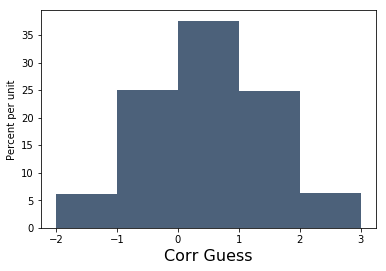

In [43]:
Corr_Incorr = np.arange(2)
Cvalues = make_array()
for i in np.arange(100000):
    Cvalues = np.append(Cvalues,sum(np.random.choice(Corr_Incorr,4))-2)
Table().with_column('Corr Guess',Cvalues).hist(bins=np.arange(-2,4,1)) 
p_value_sim = sum(Cvalues>=(3-2))/100000
p_value_sim

In [44]:
p_value_dir = stats.binom.sf(0,4,0.5,loc=-2)
p_value_dir

0.3125

Step 4: Conclusion

As the p-value is 0.3125 as shown through direct and simulation calculations, we fail to reject the null hypothesis. In other words, under the null hypothesis that the woman is as likely to guess one correctly as incorrectly, there is a 0.3125 probability that the woman would have guessed three out of four of the glasses with milk poured first correctly. As this is much above the reasonable 0.05 p-value cutoff, we conclude that this result does not differ enough from the hypothesis of random selection of the glasses to assume the woman knew the difference between the two. 

### Example 2: iris dataset

The `iris` dataset is common in introductory statistics. It shows various characteristics of three different species of irises. Let's determine whether the virginica species has a larger mean sepal width than that of versicolor. 

In [48]:
iris=Table().read_table("iris.csv")
iris.group(4,np.mean)

species,sepal_length mean,sepal_width mean,petal_length mean,petal_width mean
setosa,5.006,3.418,1.464,0.244
versicolor,5.936,2.77,4.26,1.326
virginica,6.588,2.974,5.552,2.026


Step 1: Define Hypothese 

I* = Probability that a virgincia iris's sepal width is greater than that of a versicolor iris

H0: I* <= 0.5


Ha: I* > 0.5

Step 2: Test Variable

$\mu$ = mean sepal width of a sample of virgincia iris - mean sepal width of a sample of versicolor iris

Step 3: Hypothesis Test

In [53]:
iris_sub=iris.select(4,1).where(0,are.not_containing('setosa'))
obs=np.diff(iris_sub.group(0,np.mean).column(1))[0]
obs

0.20399999999999974

In [67]:
virginica_sepal_widths = iris.where('species','virginica').column('sepal_width')
versicolor_sepal_widths = iris.where('species','versicolor').column('sepal_width')

C:\Users\C20Eric.Hembling\Documents\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


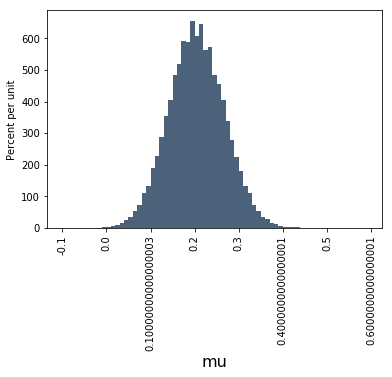

In [77]:
bootstrap_mus = make_array()
for i in np.arange(100000):
    bootstrap_mus = np.append(bootstrap_mus,np.mean(np.random.choice(virginica_sepal_widths,len(virginica_sepal_widths))) - np.mean(np.random.choice(versicolor_sepal_widths,len(versicolor_sepal_widths))))
Table().with_column('mu',bootstrap_mus).hist(bins=np.arange(-0.1,0.6,0.01))

In [98]:
conf_int_index = int(0.05*100000-1)
left_bound = np.sort(bootstrap_mus)[conf_int_index]
right_bound = np.max(bootstrap_mus)
print('95% Confidence Interval of I* [',left_bound,",",right_bound,']')

95% Confidence Interval of I* [ 0.10199999999999987 , 0.5019999999999998 ]


Step 4: Conclusion

If the null were true, I* less than or equal to 0.5 would cause $\mu$ to be near 0 for most trials. As 0 is not contained in the 95% confidence interval of $\mu$, we reject the null in favor of the alternate hypothesis. In other words, because the mean sepal width of virginica iris is more than 0.101 inches larger than that of versicolor iris for 95% of resamples from the iris table data, we conclude that the probability of the mean sepal width of a sample of virginica iris is greater than that of a sample of versicolor iris greater than 0.5.

Documentation: None.